In [1]:
!pip install -U tensorflow-addons

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
# import shap
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16,preprocess_input
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [3]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [4]:
W = 224 # The default size for ResNet is 224 but resize to .5 to save memory size
H = 224 # The default size for ResNet is 224 but resize to .5 to save memory size

label_to_class = {
    '0_N': 0,
    '1_PB': 1,
    '2_UDH': 2
}
class_to_label = {v: k for k, v in label_to_class.items()}
n_classes = len(label_to_class)

def get_images(dir_name='/kaggle/input/benign-aug-2/Class-1', label_to_class=label_to_class):
    """read images / labels from directory"""
    
    Images = []
    Classes = []
    
    for j in ['/Train','/Test']:
        for label_name in os.listdir(dir_name+str(j)):
            
            cls = label_to_class[label_name]
            print(cls)


            for img_name in os.listdir('/'.join([dir_name+str(j), label_name])):
                print(img_name)
                img = load_img('/'.join([dir_name+str(j), label_name, img_name]), target_size=(W, H))
                img = img_to_array(img)

                Images.append(img)
                Classes.append(cls)
                keras.backend.clear_session()
            keras.backend.clear_session()
            
    Images = np.array(Images)
    Classes = np.array(Classes)
    # Images, Classes = shuffle(Images, Classes, random_state=0)
    
    return Images, Classes

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
## get images / labels

Images, Classes = get_images()

Images.shape, Classes.shape


0
BRACS_761_N_1_augmented_1.png
BRACS_1325_N_9_augmented_1.png
BRACS_1235_N_42.png
BRACS_745_N_15_augmented_2.png
BRACS_1319_N_5.png
BRACS_1327_N_6_augmented_2.png
BRACS_281_N_34_augmented_2.png
BRACS_280_N_3.png
BRACS_747_N_35_augmented_2.png
BRACS_1327_N_5.png
BRACS_1507_N_4_augmented_1.png
BRACS_280_N_6.png
BRACS_283_N_9.png
BRACS_1327_N_6_augmented_1.png
BRACS_291_N_25.png
BRACS_1370_N_3.png
BRACS_297_N_31_augmented_2.png
BRACS_283_N_35_augmented_1.png
BRACS_749_N_14_augmented_2.png
BRACS_288_N_3_augmented_2.png
BRACS_281_N_11_augmented_2.png
BRACS_280_N_13_augmented_1.png
BRACS_280_N_12_augmented_2.png
BRACS_283_N_3.png
BRACS_1493_N_6_augmented_1.png
BRACS_283_N_35_augmented_2.png
BRACS_1493_N_4_augmented_2.png
BRACS_298_N_4_augmented_1.png
BRACS_747_N_14.png
BRACS_734_N_19_augmented_2.png
BRACS_1325_N_7.png
BRACS_1319_N_3_augmented_2.png
BRACS_745_N_1_augmented_2.png
BRACS_1325_N_4_augmented_1.png
BRACS_281_N_13_augmented_1.png
BRACS_743_N_9_augmented_1.png
BRACS_761_N_2_augmente

((2655, 224, 224, 3), (2655,))

In [7]:
import gc
gc.collect()


4536

In [8]:
keras.backend.clear_session()

In [9]:
# split train / test

indices_train, indices_test = train_test_split(list(range(Images.shape[0])), train_size=0.8, test_size=0.2, shuffle=True)

x_train = Images[indices_train]
y_train = Classes[indices_train]
x_test = Images[indices_test]
y_test = Classes[indices_test]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2124, 224, 224, 3), (2124,), (531, 224, 224, 3), (531,))

In [10]:
import keras
from keras.utils import to_categorical

In [11]:
# y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_train_cat = keras.utils.to_categorical(y_train, n_classes)
y_test_cat = keras.utils.to_categorical(y_test, n_classes)

y_train_cat.shape, y_train.shape, y_test.shape , y_test_cat.shape

((2124, 3), (2124,), (531,), (531, 3))

In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2124, 224, 224, 3), (2124,), (531, 224, 224, 3), (531,))

In [13]:
y_test_cat

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [14]:
import numpy as np
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [15]:
num_classes = 3
input_shape = (224, 224, 3)

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2124, 224, 224, 3), (2124,), (531, 224, 224, 3), (531,))

In [17]:
learning_rate = 0.001
weight_decay = 0.0001
num_epochs = 100
image_size = 224  # We'll resize input images to this size ###change 72 to 128

In [18]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [19]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [20]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [21]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [22]:
batch_size = [16]#,32,64]
patch_size = [16]#,32]
projection_dim = [16]#,32]
num_heads = [8,16]#,32]
transformer_layers = [8,16,32,64]

-------------------------------------START NEW COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Loop Number 1
Run Number-0-0-0-0-0
batch_size = 16, patch_size = 16, projection_dim = 16, num_heads = 8, transformer_layers = 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------------------------------------------------------
Total Patches: 196
Epoch 1/100
107/107 [==============================] - 21s 91ms/step - loss: 2.4827 - accuracy: 0.4002 - val_loss: 1.1409 - val_accuracy: 0.4118
Epoch 2/100
107/107 [==============================] - 7s 70ms/step - loss: 1.0943 - accuracy: 0.4644 - val_loss: 0.9708 - val_accuracy: 0.4871
Epoch 3/100
107/107 [==============================] - 8s 70ms/step - loss: 1.0183 - accuracy: 0.5138 - val_loss: 0.9492 - val_accuracy: 0.5247
Epoch 4/100
107/107 [

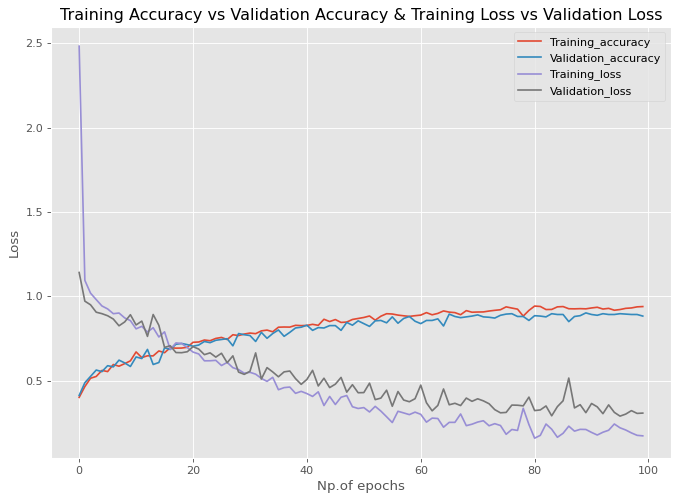

17/17 [==============================] - 1s 34ms/step
f1_weighted: 0.8994079799216178
accuracy: 0.9001883239171374


<Figure size 640x480 with 0 Axes>

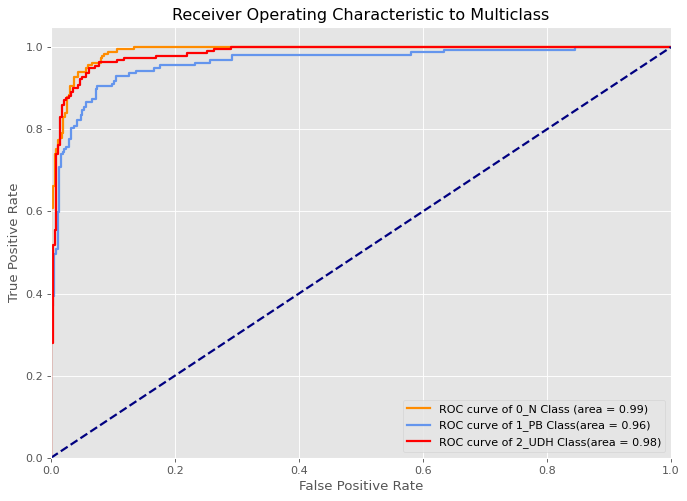

<Figure size 8000x560 with 0 Axes>

<Figure size 640x480 with 0 Axes>

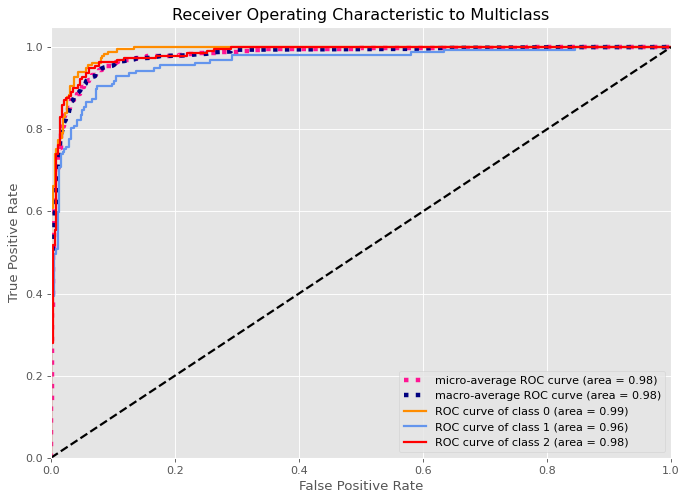

classification Report
              precision    recall  f1-score   support

         0_N       0.89      0.96      0.92       181
        1_PB       0.89      0.82      0.85       157
       2_UDH       0.92      0.91      0.91       193

    accuracy                           0.90       531
   macro avg       0.90      0.90      0.90       531
weighted avg       0.90      0.90      0.90       531



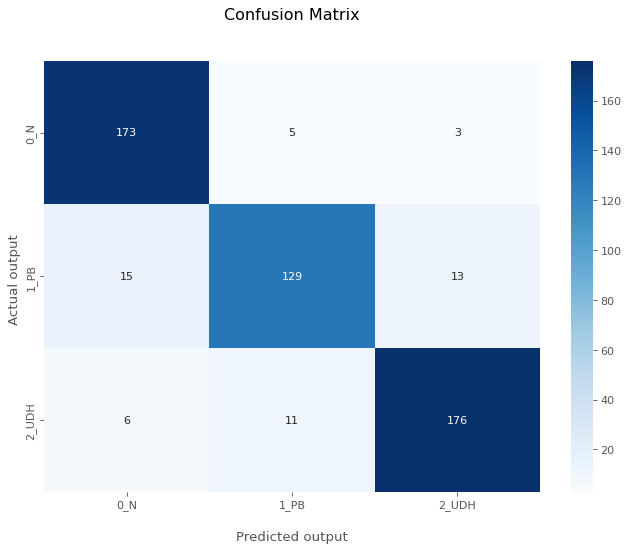

classification Report
Accuracy,Precision, Recall


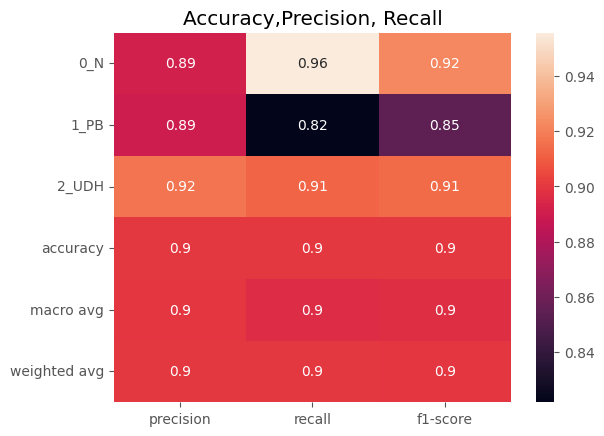

-------------------------------------------END COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
---------------------------------------------------------------------------------------------------
-------------------------------------START NEW COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Loop Number 2
Run Number-0-0-0-0-1
batch_size = 16, patch_size = 16, projection_dim = 16, num_heads = 8, transformer_layers = 16
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------------------------------------------------------
Total Patches: 196
Epoch 1/100
107/107 [==============================] - 37s 151ms/step - loss: 2.7072 - accuracy: 0.4091 - val_loss: 0.9449 - val_accuracy: 0.5200
Epoch 2

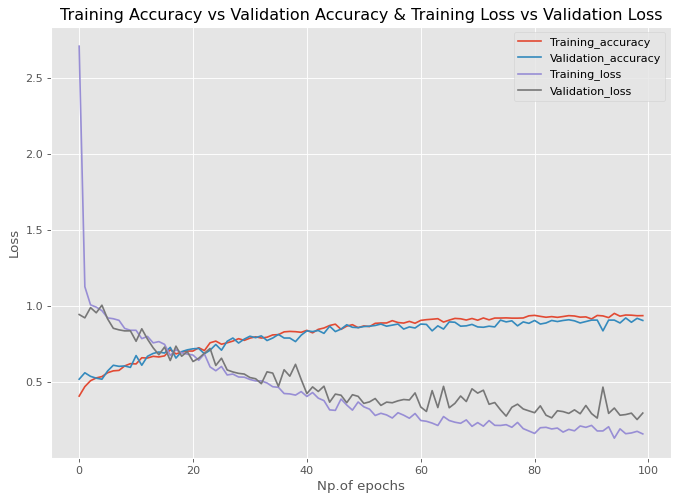

17/17 [==============================] - 1s 59ms/step
f1_weighted: 0.9186627926450733
accuracy: 0.9190207156308852


<Figure size 640x480 with 0 Axes>

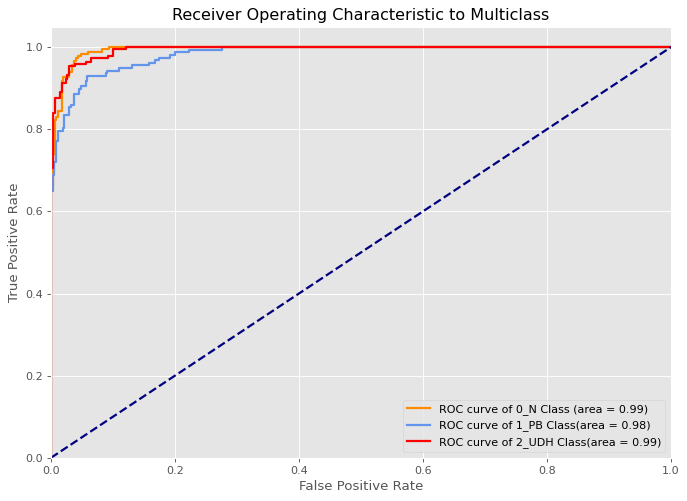

<Figure size 8000x560 with 0 Axes>

<Figure size 640x480 with 0 Axes>

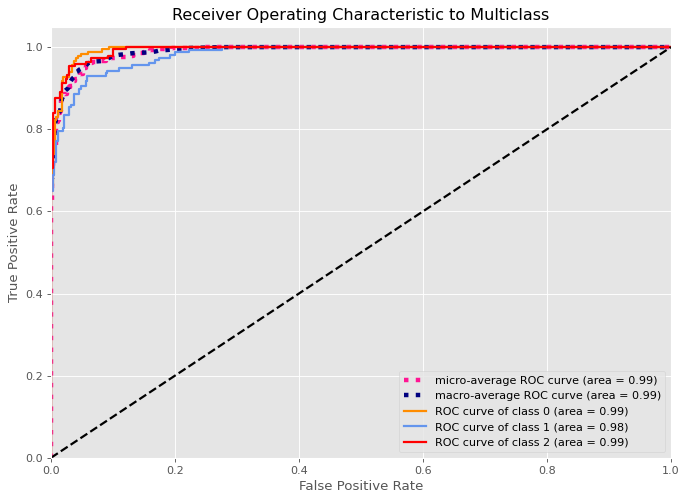

classification Report
              precision    recall  f1-score   support

         0_N       0.87      0.99      0.93       181
        1_PB       0.92      0.85      0.89       157
       2_UDH       0.97      0.91      0.94       193

    accuracy                           0.92       531
   macro avg       0.92      0.92      0.92       531
weighted avg       0.92      0.92      0.92       531



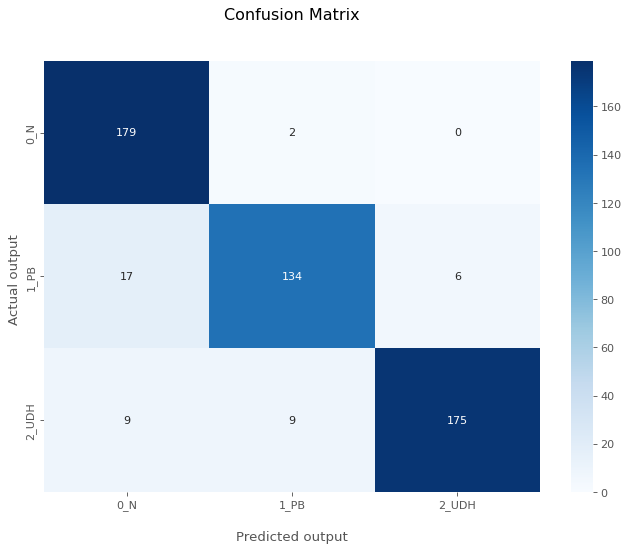

classification Report
Accuracy,Precision, Recall


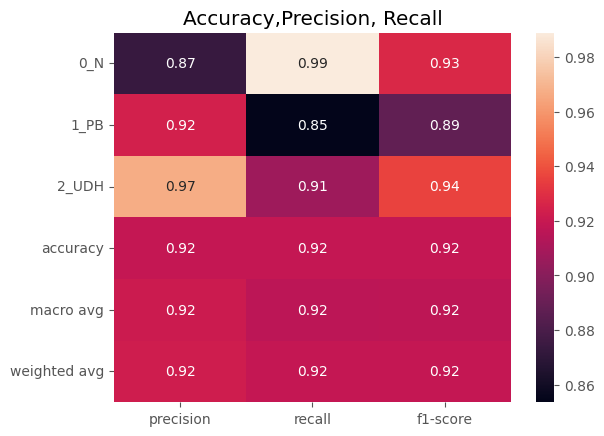

-------------------------------------------END COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
---------------------------------------------------------------------------------------------------
-------------------------------------START NEW COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Loop Number 3
Run Number-0-0-0-0-2
batch_size = 16, patch_size = 16, projection_dim = 16, num_heads = 8, transformer_layers = 32
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------------------------------------------------------
Total Patches: 196
Epoch 1/100
107/107 [==============================] - 74s 291ms/step - loss: 2.5510 - accuracy: 0.3908 - val_loss: 1.0657 - val_accuracy: 0.4047
Epoch 2

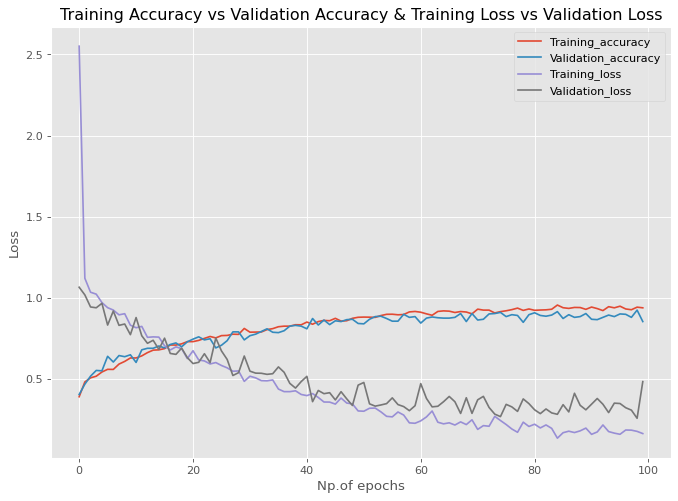

17/17 [==============================] - 2s 108ms/step
f1_weighted: 0.9375474524025987
accuracy: 0.9378531073446328


<Figure size 640x480 with 0 Axes>

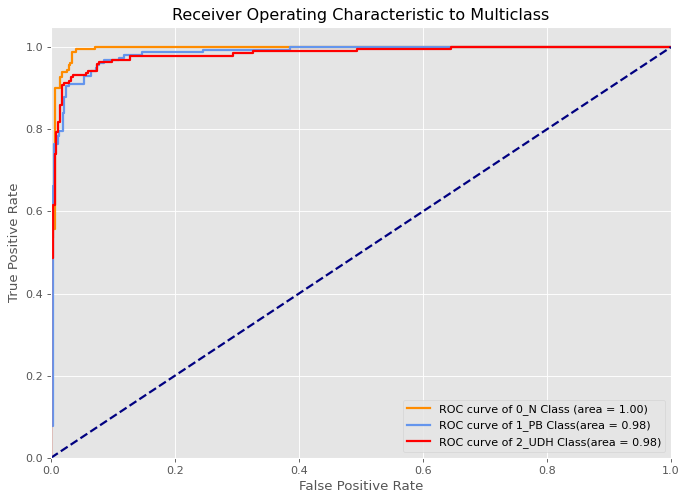

<Figure size 8000x560 with 0 Axes>

<Figure size 640x480 with 0 Axes>

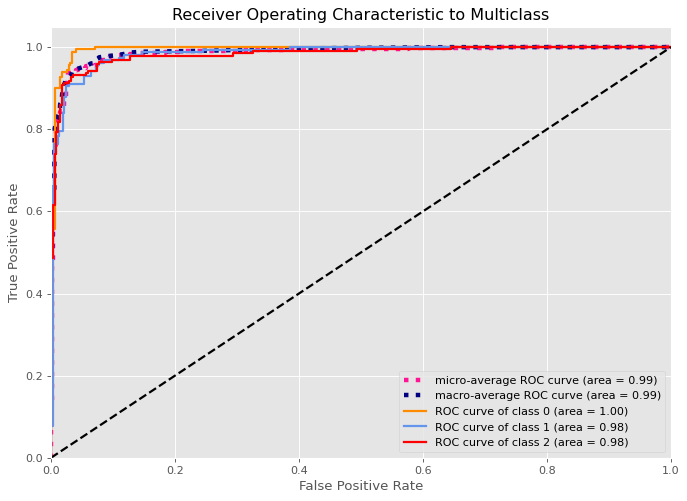

classification Report
              precision    recall  f1-score   support

         0_N       0.93      0.99      0.96       181
        1_PB       0.93      0.91      0.92       157
       2_UDH       0.96      0.91      0.93       193

    accuracy                           0.94       531
   macro avg       0.94      0.94      0.94       531
weighted avg       0.94      0.94      0.94       531



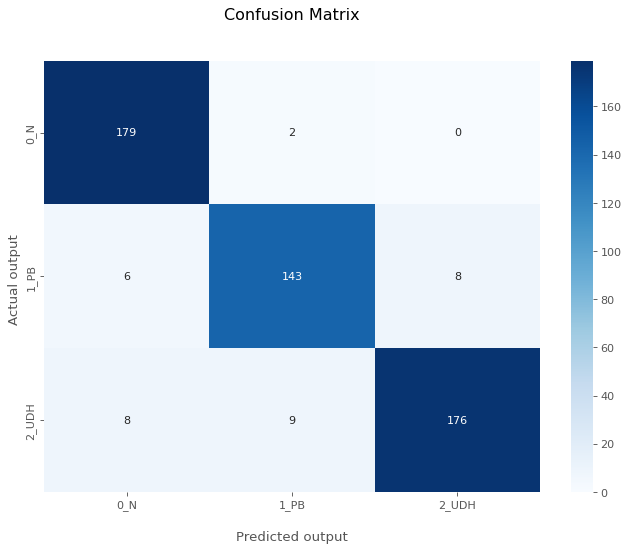

classification Report
Accuracy,Precision, Recall


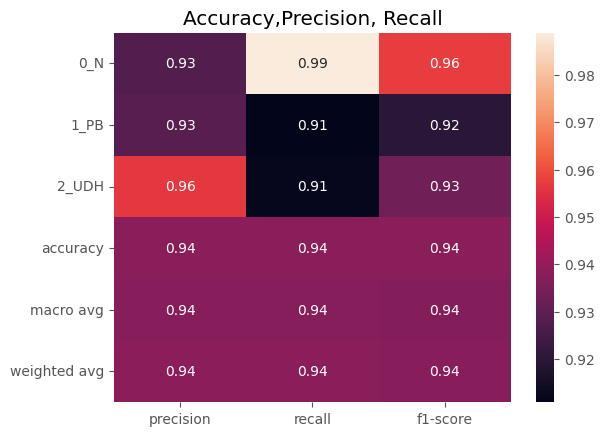

-------------------------------------------END COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
---------------------------------------------------------------------------------------------------
-------------------------------------START NEW COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Loop Number 4
Run Number-0-0-0-0-3
batch_size = 16, patch_size = 16, projection_dim = 16, num_heads = 8, transformer_layers = 64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------------------------------------------------------
Total Patches: 196
Epoch 1/100
107/107 [==============================] - 149s 550ms/step - loss: 2.7323 - accuracy: 0.3431 - val_loss: 1.2824 - val_accuracy: 0.3694
Epoch 

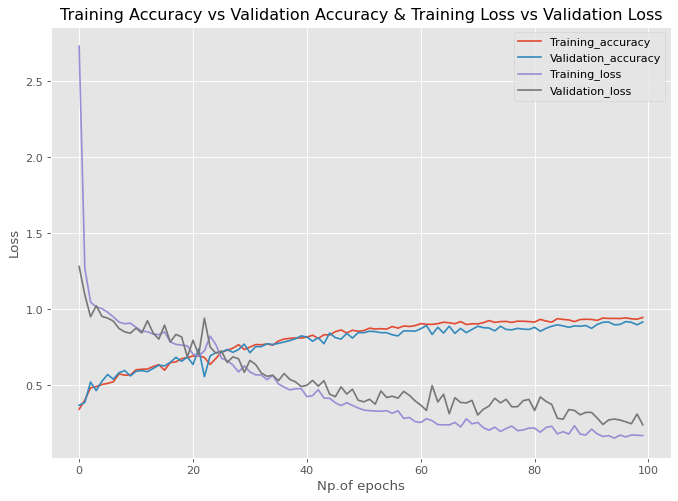

17/17 [==============================] - 4s 207ms/step
f1_weighted: 0.920434687572
accuracy: 0.9209039548022598


<Figure size 640x480 with 0 Axes>

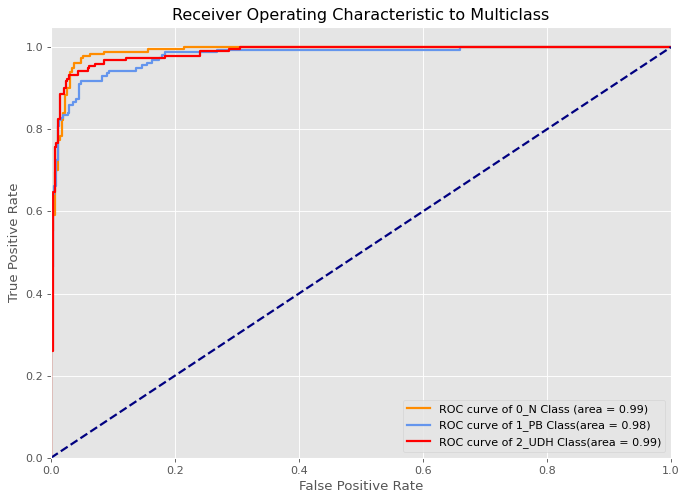

<Figure size 8000x560 with 0 Axes>

<Figure size 640x480 with 0 Axes>

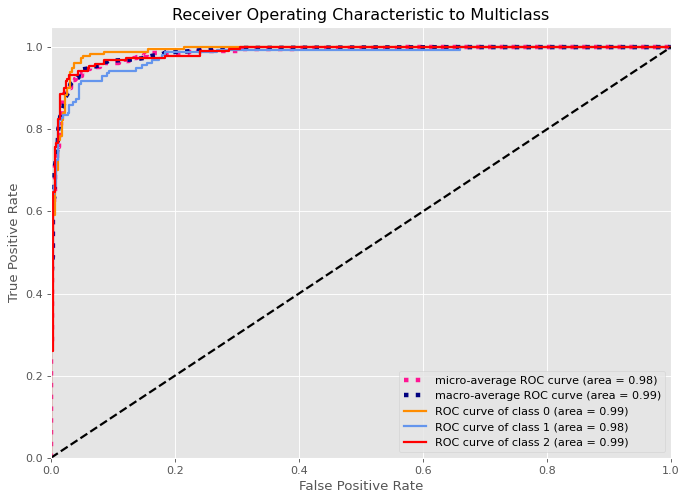

classification Report
              precision    recall  f1-score   support

         0_N       0.89      0.98      0.93       181
        1_PB       0.92      0.85      0.89       157
       2_UDH       0.95      0.92      0.94       193

    accuracy                           0.92       531
   macro avg       0.92      0.92      0.92       531
weighted avg       0.92      0.92      0.92       531



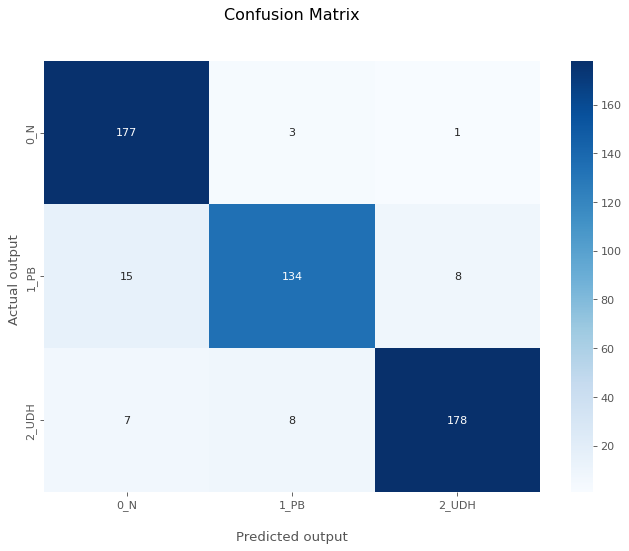

classification Report
Accuracy,Precision, Recall


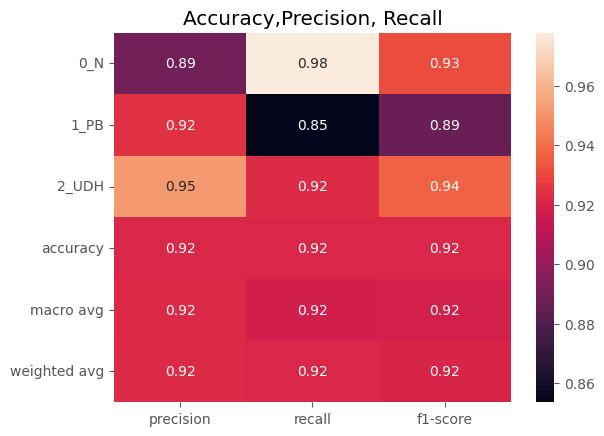

-------------------------------------------END COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
---------------------------------------------------------------------------------------------------
-------------------------------------START NEW COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Loop Number 5
Run Number-0-0-0-1-0
batch_size = 16, patch_size = 16, projection_dim = 16, num_heads = 16, transformer_layers = 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------------------------------------------------------
Total Patches: 196
Epoch 1/100
107/107 [==============================] - 23s 118ms/step - loss: 2.6285 - accuracy: 0.4255 - val_loss: 1.1044 - val_accuracy: 0.4682
Epoch 2

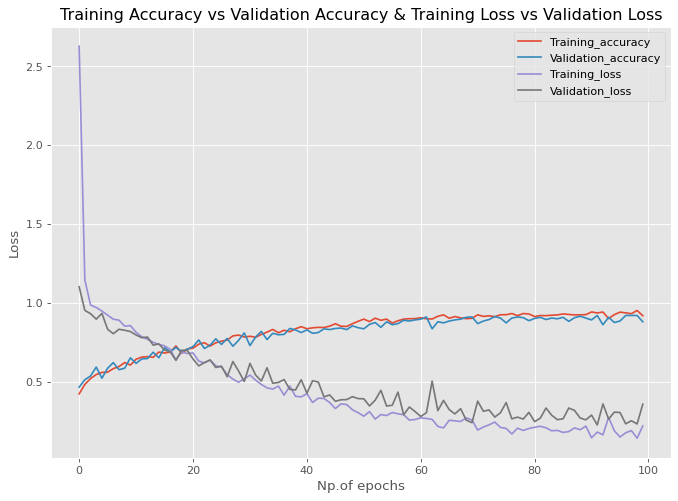

17/17 [==============================] - 1s 51ms/step
f1_weighted: 0.906543188097661
accuracy: 0.9077212806026366


<Figure size 640x480 with 0 Axes>

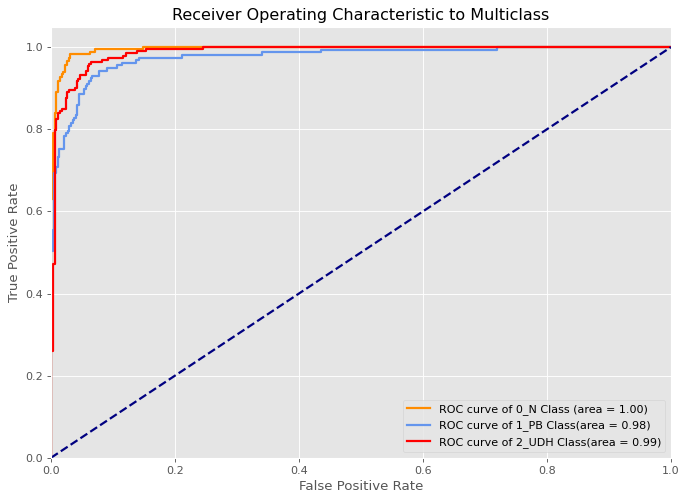

<Figure size 8000x560 with 0 Axes>

<Figure size 640x480 with 0 Axes>

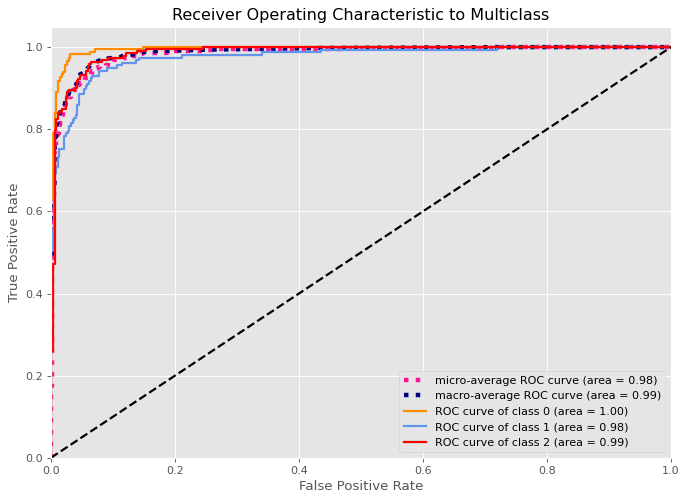

classification Report
              precision    recall  f1-score   support

         0_N       0.89      0.98      0.93       181
        1_PB       0.91      0.82      0.86       157
       2_UDH       0.93      0.91      0.92       193

    accuracy                           0.91       531
   macro avg       0.91      0.90      0.90       531
weighted avg       0.91      0.91      0.91       531



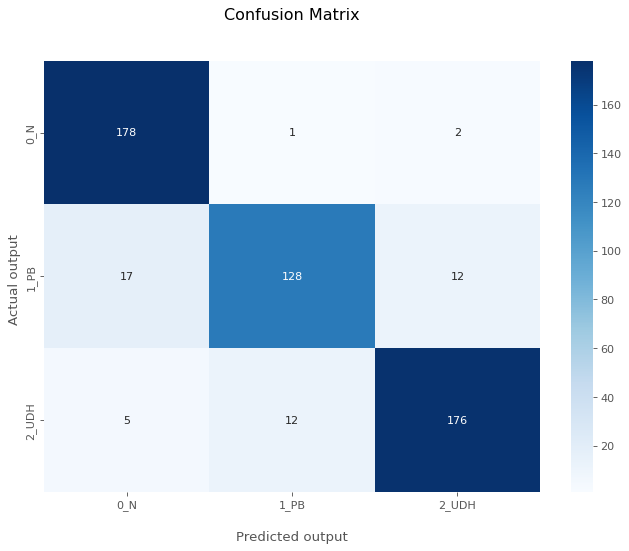

classification Report
Accuracy,Precision, Recall


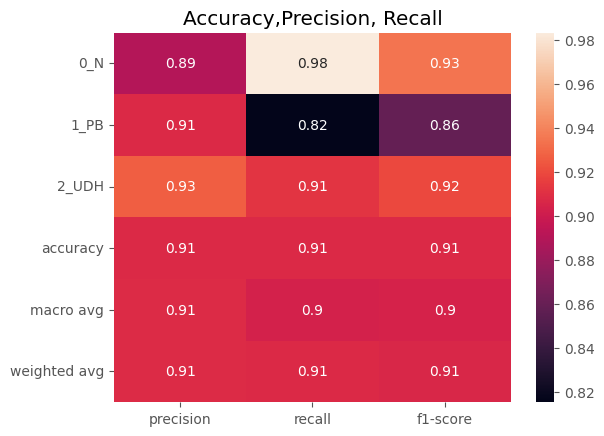

-------------------------------------------END COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
---------------------------------------------------------------------------------------------------
-------------------------------------START NEW COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Loop Number 6
Run Number-0-0-0-1-1
batch_size = 16, patch_size = 16, projection_dim = 16, num_heads = 16, transformer_layers = 16
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------------------------------------------------------
Total Patches: 196
Epoch 1/100
107/107 [==============================] - 44s 213ms/step - loss: 3.1580 - accuracy: 0.3749 - val_loss: 1.1288 - val_accuracy: 0.3882
Epoch 

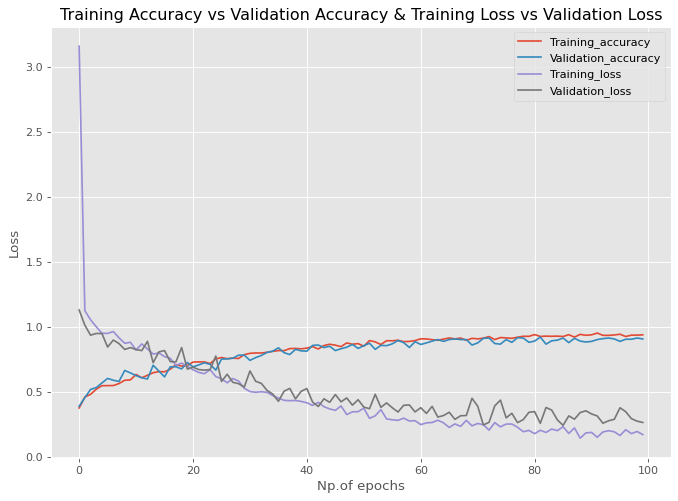

17/17 [==============================] - 2s 92ms/step
f1_weighted: 0.9028486716958821
accuracy: 0.9020715630885122


<Figure size 640x480 with 0 Axes>

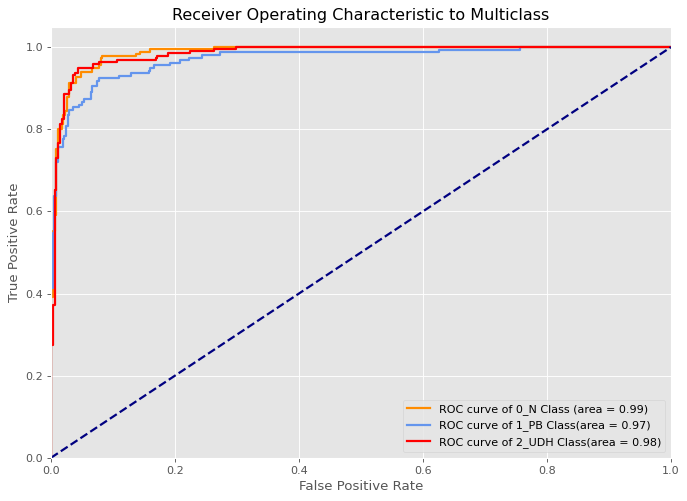

<Figure size 8000x560 with 0 Axes>

<Figure size 640x480 with 0 Axes>

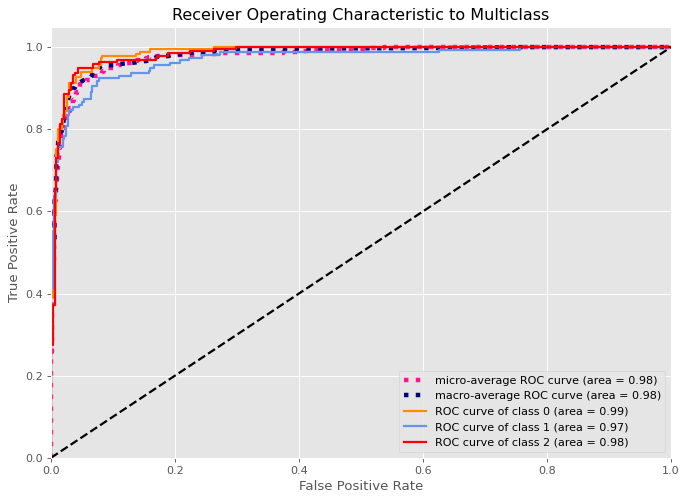

classification Report
              precision    recall  f1-score   support

         0_N       0.92      0.91      0.91       181
        1_PB       0.83      0.92      0.87       157
       2_UDH       0.96      0.88      0.92       193

    accuracy                           0.90       531
   macro avg       0.90      0.90      0.90       531
weighted avg       0.91      0.90      0.90       531



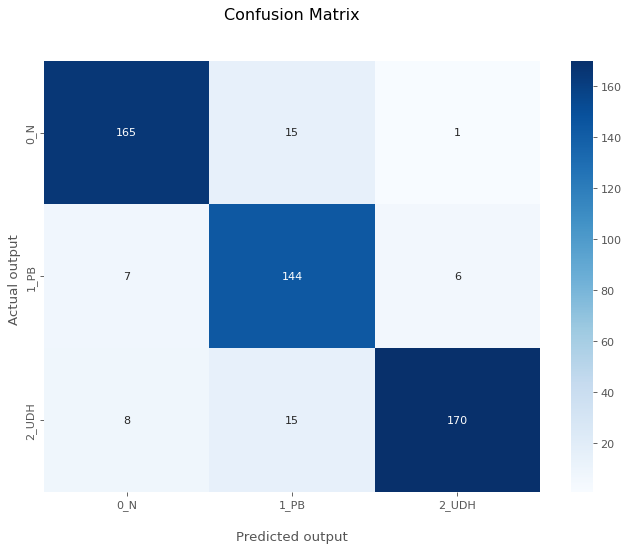

classification Report
Accuracy,Precision, Recall


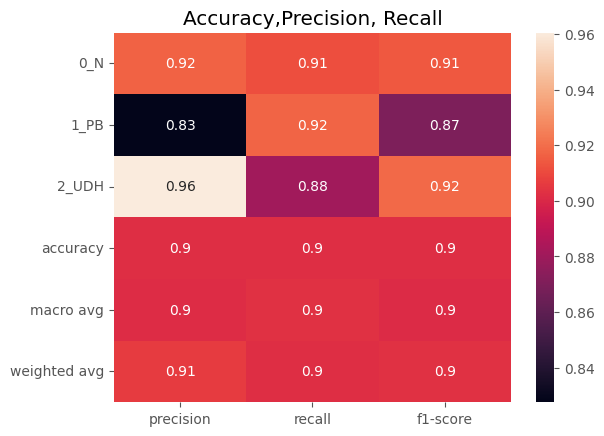

-------------------------------------------END COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
---------------------------------------------------------------------------------------------------
-------------------------------------START NEW COMBINATION-----------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Loop Number 7
Run Number-0-0-0-1-2
batch_size = 16, patch_size = 16, projection_dim = 16, num_heads = 16, transformer_layers = 32
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
--------------------------------------------------------------------------------------------------
Total Patches: 196
Epoch 1/100
107/107 [==============================] - 86s 411ms/step - loss: 2.5624 - accuracy: 0.3814 - val_loss: 1.0997 - val_accuracy: 0.4376
Epoch 

In [ ]:
count = 0
for i in range(1):
  for j in range(1):
    for k in range(1):
      for n in range(2):
        for m in range(4):

          print("-------------------------------------START NEW COMBINATION-----------------------------------------")
          print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
          gc.collect()
          count+=1
          print(f"Loop Number {count}")
          print(f"Run Number-{i}-{j}-{k}-{n}-{m}")
          print(f"batch_size = {batch_size[i]}, patch_size = {patch_size[j]}, projection_dim = {projection_dim[k]}, num_heads = {num_heads[n]}, transformer_layers = {transformer_layers[m]}")
          print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
          print("--------------------------------------------------------------------------------------------------")
          num_patches = (image_size // patch_size[j]) ** 2
          transformer_units = [
              projection_dim[k] * 2,
              projection_dim[k]]  # Size of the transformer layers
          mlp_head_units = [2048, 1024] 


          #patch_create(patch_size[j])
          print(f"Total Patches: {num_patches}")

          def create_vit_classifier():
              inputs = layers.Input(shape=input_shape)
              # Augment data.
              augmented = data_augmentation(inputs)
              # Create patches.
              patches = Patches(patch_size[j])(augmented)
              # Encode patches.
              encoded_patches = PatchEncoder(num_patches, projection_dim[k])(patches)

              # Create multiple layers of the Transformer block.
              for _ in range(transformer_layers[m]):
                  # Layer normalization 1.
                  x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
                  # Create a multi-head attention layer.
                  attention_output = layers.MultiHeadAttention(
                      num_heads=num_heads[n], key_dim=projection_dim[k], dropout=0.1
                  )(x1, x1)
                  # Skip connection 1.
                  x2 = layers.Add()([attention_output, encoded_patches])
                    
                  # Layer normalization 2.
                  x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
                  # MLP.
                  x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
                  # Skip connection 2.
                  encoded_patches = layers.Add()([x3, x2])
                    
                    

              # Create a [batch_size, projection_dim] tensor.
              representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
              representation = layers.Flatten()(representation)
              representation = layers.Dropout(0.5)(representation)
              # Add MLP.
              features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
              # Classify outputs.
              logits = layers.Dense(num_classes,activation="softmax")(features)
              # Create the Keras model.
              model = keras.Model(inputs=inputs, outputs=logits)
              return model

          # vit_classifier = create_vit_classifier(new_patch_size, num_patches, new_projection_dim, new_transformer_layers)
          
          def run_experiment(model):
              optimizer = tfa.optimizers.AdamW(
                  learning_rate=learning_rate, weight_decay=weight_decay
              )

              model.compile(
                  optimizer=optimizer,
                  loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                  #loss='binary_crossentropy',
                  metrics=[
                      #  'accuracy',
                        # keras.metrics.TruePositives(name='tp'),
                        # keras.metrics.FalsePositives(name='fp'),
                        # keras.metrics.TrueNegatives(name='tn'),
                        # keras.metrics.FalseNegatives(name='fn'), 
                        # keras.metrics.BinaryAccuracy(name='accuracy'),
                        keras.metrics.CategoricalAccuracy(name="accuracy"),
                        # keras.metrics.Precision(name='precision'),
                        # keras.metrics.Recall(name='recall'),
                        # keras.metrics.AUC(name='auc'),
                        # keras.metrics.AUC(name='prc', curve='PR'),

                  ],
              )

              checkpoint_filepath = "/tmp/checkpoint"
              checkpoint_callback = keras.callbacks.ModelCheckpoint(
                  checkpoint_filepath,
                  monitor="val_accuracy",
                  save_best_only=True,
                  save_weights_only=True,
              )

              history = model.fit(
                  x=x_train,
                  y=y_train_cat,
                  batch_size=batch_size[i],
                  epochs=num_epochs,
                  validation_split=0.2,
                  callbacks=[checkpoint_callback],
              )
              y_pred=model.predict(x_test)

              model.load_weights(checkpoint_filepath)
              return history


          vit_classifier = create_vit_classifier()
          history = run_experiment(vit_classifier)                  
          loss, accuracy = vit_classifier.evaluate(x_test, y_test_cat)
          print("\n")
          print(" Test Evaluations Scores: ","loss: ", loss," accuracy: ",accuracy)
          print("\n")



          from matplotlib.pyplot import figure
          import matplotlib.pyplot as plt
          plt.style.use('ggplot')
          figure(figsize=(10, 7), dpi=80)
          # plt.plot([1, 0], [0, 1], 'k--')
          plt.plot(history.history['accuracy'],label='Training_accuracy')
          plt.plot(history.history['val_accuracy'],label='Validation_accuracy')
          plt.plot(history.history['loss'],label='Training_loss')
          plt.plot(history.history['val_loss'],label='Validation_loss')
          plt.legend()
          plt.title('Training Accuracy vs Validation Accuracy & Training Loss vs Validation Loss')
          plt.xlabel('No.of epochs')
          plt.ylabel('Accuracy')
          plt.xlabel('Np.of epochs')
          plt.ylabel('Loss')
          plt.show()



          y_pred_vit=vit_classifier.predict(x_test)
          import sklearn.metrics as metrics
          print("f1_weighted:",metrics.f1_score(np.argmax(y_test_cat, axis=1), np.argmax(y_pred_vit, axis=1),average='weighted'))

          # %% Accuracy
          print("accuracy:",metrics.accuracy_score(np.argmax(y_test_cat, axis=1), np.argmax(y_pred_vit, axis=1)))
                  

 


          n_classes = 3 # number of class




          # Compute ROC curve and ROC area for each class
          fpr = dict()
          tpr = dict()
          roc_auc = dict()
          for c in range(n_classes):
              fpr[c], tpr[c], _ = roc_curve(y_test_cat[:, c], y_pred_vit[:, c], )
              roc_auc[c] = auc(fpr[c], tpr[c])

          # Compute micro-average ROC curve and ROC area
          fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred_vit.ravel())
          roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

          from matplotlib.pyplot import figure
          # %% ROC Curve Plot
          plt.figure()
          plt.style.use('ggplot')
          figure(figsize=(10, 7), dpi=80)
          lw = 2 # line_width
          plt.plot(fpr[0], tpr[0], color='darkorange',
                          lw=lw, label='ROC curve of 0_N Class (area = %0.2f)' % roc_auc[0])

          plt.plot(fpr[1], tpr[1], color='cornflowerblue',
                          lw=lw, label='ROC curve of 1_PB Class(area = %0.2f)' % roc_auc[1])
          plt.plot(fpr[2], tpr[2], color='red',
                          lw=lw, label='ROC curve of 2_UDH Class(area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 3. class 

          plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
          plt.xlim([0.0, 1.0])
          plt.ylim([0.0, 1.05])
          plt.xlabel('False Positive Rate')
          plt.ylabel('True Positive Rate')
          plt.title('Receiver Operating Characteristic to Multiclass')
          plt.legend(loc="lower right")
          plt.show()


          # %% Process of plotting roc-auc curve belonging to all classes.
          from matplotlib.pyplot import figure
          import matplotlib.pyplot as plt
          plt.style.use('ggplot')
          figure(figsize=(100, 7), dpi=80)
          from itertools import cycle
          roc_auc_scores = []
          # First aggregate all false positive rates
          all_fpr = np.unique(np.concatenate([fpr[d] for d in range(n_classes)]))

          # Then interpolate all ROC curves at this points
          mean_tpr = np.zeros_like(all_fpr)
          for b in range(n_classes):
              mean_tpr += interp(all_fpr, fpr[b], tpr[b])

          # Finally average it and compute AUC
          mean_tpr /= n_classes

          fpr["macro"] = all_fpr
          tpr["macro"] = mean_tpr
          roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

          # Plot all ROC curves

          plt.figure()
          plt.style.use('ggplot')
          figure(figsize=(10, 7), dpi=80)
          plt.plot(fpr["micro"], tpr["micro"],
                          label='micro-average ROC curve (area = {0:0.2f})'
                                ''.format(roc_auc["micro"]),
                          color='deeppink', linestyle=':', linewidth=4)

          plt.plot(fpr["macro"], tpr["macro"],
                          label='macro-average ROC curve (area = {0:0.2f})'
                                ''.format(roc_auc["macro"]),
                          color='navy', linestyle=':', linewidth=4)

          colors = cycle(['darkorange', 'cornflowerblue','red'])
          for a, color in zip(range(n_classes), colors):
              plt.plot(fpr[a], tpr[a], color=color, lw=lw,
                              label='ROC curve of class {0} (area = {1:0.2f})'
                              ''.format(a, roc_auc[a]))
              roc_auc_scores.append(roc_auc[a])


          plt.plot([0, 1], [0, 1], 'k--', lw=lw)
          plt.xlim([0.0, 1.0])
          plt.ylim([0.0, 1.05])
          plt.xlabel('False Positive Rate')
          plt.ylabel('True Positive Rate')
          plt.title('Receiver Operating Characteristic to Multiclass')
          plt.legend(loc="lower right")
          plt.show()



            # %% Confusion Matrics Calculate
          from sklearn.metrics import confusion_matrix,classification_report
          cm=confusion_matrix(np.argmax(y_test_cat, axis=1),np.argmax(y_pred_vit, axis=1))
          target_names=['0_N',
                        '1_PB',
                        '2_UDH'
                    ]
          print("classification Report")
          print(classification_report(np.argmax(y_test_cat, axis=1),np.argmax(y_pred_vit, axis=1),target_names=target_names,digits=2))
          plt.style.use('ggplot')
          figure(figsize=(10, 7), dpi=80)
          f = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  #confusion matrix plot
          f.set_title('Confusion Matrix\n\n');
          f.set_xlabel('\nPredicted output')
          f.set_ylabel('Actual output ');
          f.xaxis.set_ticklabels(['0_N',
                        '1_PB',
                        '2_UDH'])
          f.yaxis.set_ticklabels(['0_N',
                        '1_PB',
                        '2_UDH'])
          plt.show()


          print("classification Report")

          classes = ['0_N',
                    '1_PB',
                    '2_UDH']
          from sklearn.metrics import classification_report
          clf_report = classification_report(np.argmax(y_test_cat, axis=1),
                                                    np.argmax(y_pred_vit, axis=1),
                                                    target_names=classes,
                                                    output_dict=True)
          print("Accuracy,Precision, Recall")
          plt.title('Accuracy,Precision, Recall')
          sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
          plt.show()
          print("-------------------------------------------END COMBINATION-----------------------------------------")
          print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
          print("---------------------------------------------------------------------------------------------------")
